# Visualize the data from CSV

In [269]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np

# X= # of pods/instances, Y=speedup

In [224]:
pd_fig_1 = pd.read_csv("./sample_charts/figure_1.csv", sep=';')
pd_fig_1.head(3)

,Time,Indexed documents pod,Indexer pods,Rate
0,2019-12-10T08:30:20-05:00,NaN,NaN,NaN
1,2019-12-10T08:30:35-05:00,NaN,NaN,NaN
2,2019-12-10T08:30:50-05:00,NaN,NaN,NaN


In [225]:
pd_fig1_ind2_1 = pd_fig_1.loc[pd_fig_1['Indexer pods'] == 2]
pd_fig1_ind2_1.head(3)

,Time,Indexed documents pod,Indexer pods,Rate
21,2019-12-10T08:35:35-05:00,31,2.0,NaN
22,2019-12-10T08:35:50-05:00,74,2.0,0.0
24,2019-12-10T08:36:20-05:00,33,2.0,0.0


In [227]:
pd_fig1_ind2_1['Indexed documents pod'] = pd_fig1_ind2_1['Indexed documents pod'].str.replace(',', '')
pd_fig1_ind2_1

,Time,Indexed documents pod,Indexer pods,Rate
21,2019-12-10T08:35:35-05:00,31,2.0,NaN
22,2019-12-10T08:35:50-05:00,74,2.0,0.000
24,2019-12-10T08:36:20-05:00,33,2.0,0.000
25,2019-12-10T08:36:35-05:00,112,2.0,1.440
26,2019-12-10T08:36:50-05:00,189,2.0,3.368
27,2019-12-10T08:37:05-05:00,270,2.0,4.767
28,2019-12-10T08:37:20-05:00,349,2.0,5.245
29,2019-12-10T08:37:35-05:00,431,2.0,5.333
30,2019-12-10T08:37:50-05:00,511,2.0,5.311
31,2019-12-10T08:38:05-05:00,596,2.0,5.449


In [233]:
pd_fig1_ind2_1['Indexed documents pod'] = pd_fig1_ind2_1['Indexed documents pod'].astype(int)

In [234]:
total_doc = pd_fig1_ind2_1['Indexed documents pod'].sum()

In [235]:
print(total_doc)

45973


In [239]:
# 1. Change Time to datetime
pd_fig1_ind2_1['time_stamp'] = pd.to_datetime(pd_fig1_ind2_1['Time'])
# 2. Substract the first time and make it into relative time
pd_fig1_ind2_1['time_stamp'] = pd_fig1_ind2_1['time_stamp'].sub(pd_fig1_ind2_1['time_stamp'][21], axis=0)
# 3. Add another column for time in seconds
pd_fig1_ind2_1['time_stamp_sec'] = pd.Series(np.random.randn(len(pd_fig1_ind2_1['Time'])), index = pd_fig1_ind2_1.index)
# 4. Change the relative time into seconds
pd_fig1_ind2_1['time_stamp_sec'] = pd_fig1_ind2_1['time_stamp'].dt.total_seconds()

In [241]:
pd_fig1_ind2_1.tail(5)

,Time,Indexed documents pod,Indexer pods,Rate,time_stamp,time_stamp_sec
53,2019-12-10T08:43:35-05:00,2340,2.0,5.044,00:08:00,480.0
54,2019-12-10T08:43:50-05:00,2425,2.0,5.267,00:08:15,495.0
55,2019-12-10T08:44:05-05:00,2510,2.0,5.533,00:08:30,510.0
56,2019-12-10T08:44:20-05:00,2589,2.0,5.533,00:08:45,525.0
57,2019-12-10T08:44:35-05:00,2670,2.0,5.444,00:09:00,540.0


In [243]:
rate = total_doc/pd_fig1_ind2_1['time_stamp_sec'][57]
print(rate)

85.13518518518518


In [257]:
data_point_1 = [2.0, rate]

In [245]:
# 1. Get the rows with required # of pods
pd_2 = pd_fig_1.loc[pd_fig_1['Indexer pods'] == 4]
# 2. Remove the comma in the number
pd_2['Indexed documents pod'] = pd_2['Indexed documents pod'].str.replace(',', '')
# 3. Number typer str to int
pd_2['Indexed documents pod'] = pd_2['Indexed documents pod'].astype(int)
# 4. Sum totoal number of files
total_doc_2 = pd_2['Indexed documents pod'].sum()

print(total_doc_2)

197221


In [247]:
pd_2.head(3)

,Time,Indexed documents pod,Indexer pods,Rate,time_stamp
58,2019-12-10T08:44:50-05:00,2756,4.0,5.022,2019-12-10 08:44:50-05:00
59,2019-12-10T08:45:05-05:00,2857,4.0,4.764,2019-12-10 08:45:05-05:00
60,2019-12-10T08:45:20-05:00,2967,4.0,5.423,2019-12-10 08:45:20-05:00


In [248]:
# 1. Change Time to datetime
pd_2['time_stamp'] = pd.to_datetime(pd_2['Time'])
# 2. Substract the first time and make it into relative time
pd_2['time_stamp'] = pd_2['time_stamp'].sub(pd_2['time_stamp'][58], axis=0)
# 3. Add another column for time in seconds
pd_2['time_stamp_sec'] = pd.Series(np.random.randn(len(pd_2['Time'])), index = pd_2.index)
# 4. Change the relative time into seconds
pd_2['time_stamp_sec'] = pd_2['time_stamp'].dt.total_seconds()

pd_2.tail(3)

,Time,Indexed documents pod,Indexer pods,Rate,time_stamp,time_stamp_sec
96,2019-12-10T08:54:20-05:00,6640,4.0,6.844,00:09:30,570.0
97,2019-12-10T08:54:35-05:00,6752,4.0,7.156,00:09:45,585.0
98,2019-12-10T08:54:50-05:00,6835,4.0,6.667,00:10:00,600.0


In [249]:
pd_2.head(1)

,Time,Indexed documents pod,Indexer pods,Rate,time_stamp,time_stamp_sec
58,2019-12-10T08:44:50-05:00,2756,4.0,5.022,0 days,0.0


In [251]:
rate_2 = total_doc_2/600.0
print(rate_2)
data_point_2 = [4.0, rate_2]

328.70166666666665


In [252]:
# 1. Get the rows with required # of pods
pd_3 = pd_fig_1.loc[pd_fig_1['Indexer pods'] == 8]
# 2. Remove the comma in the number
pd_3['Indexed documents pod'] = pd_3['Indexed documents pod'].str.replace(',', '')
# 3. Number typer str to int
pd_3['Indexed documents pod'] = pd_3['Indexed documents pod'].astype(int)
# 4. Sum totoal number of files
total_doc_3 = pd_3['Indexed documents pod'].sum()

print(total_doc_3)

172699


In [253]:
pd_3.head(3)

,Time,Indexed documents pod,Indexer pods,Rate
100,2019-12-10T08:55:20-05:00,7041,8.0,5.405
101,2019-12-10T08:55:35-05:00,7160,8.0,5.827
102,2019-12-10T08:55:50-05:00,7277,8.0,6.415


In [254]:
# 1. Change Time to datetime
pd_3['time_stamp'] = pd.to_datetime(pd_3['Time'])
# 2. Substract the first time and make it into relative time
pd_3['time_stamp'] = pd_3['time_stamp'].sub(pd_3['time_stamp'][100], axis=0)
# 3. Add another column for time in seconds
pd_3['time_stamp_sec'] = pd.Series(np.random.randn(len(pd_3['Time'])), index = pd_3.index)
# 4. Change the relative time into seconds
pd_3['time_stamp_sec'] = pd_3['time_stamp'].dt.total_seconds()

pd_3.tail(3)

,Time,Indexed documents pod,Indexer pods,Rate,time_stamp,time_stamp_sec
118,2019-12-10T08:59:50-05:00,9167,8.0,7.467,00:04:30,270.0
119,2019-12-10T09:00:05-05:00,9281,8.0,7.533,00:04:45,285.0
120,2019-12-10T09:00:20-05:00,9392,8.0,7.244,00:05:00,300.0


In [255]:
rate_3 = total_doc_3/300.0
print(rate_3)
data_point_3 = [8.0, rate_3]

575.6633333333333


In [260]:
x = [data_point_1[0], data_point_2[0], data_point_3[0]]
y = [data_point_1[1], data_point_2[1], data_point_3[1]]

Text(0, 0.5, 'Speedup')

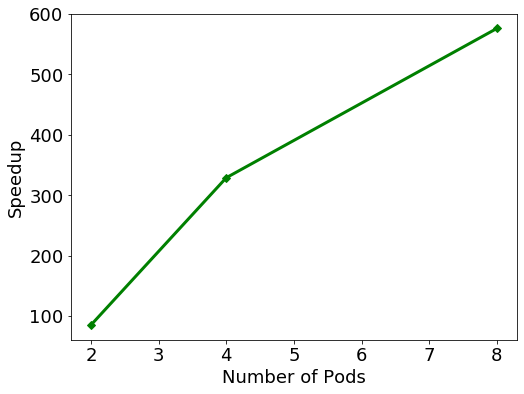

In [278]:
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, '-gD', lw=3)
# fig.suptitle('Speedup with # of pods increasing', fontsize=22)
plt.xlabel('Number of Pods', fontsize=18)
plt.ylabel('Speedup', fontsize=18)

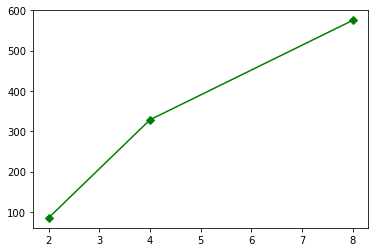

In [264]:
plt.plot(x, y, '-gD')
plt.show()

# cpu_by_container

In [181]:
pd_raw_cpu = pd.read_csv("./sample_charts/cpu_by_container.csv", sep=';')
pd_raw_cpu.head(3)

,Time,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
0,2019-12-08T21:08:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08T21:08:30-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-08T21:09:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# 1. Change Time to datetime
pd_raw_cpu['time_stamp'] = pd.to_datetime(pd_raw_cpu['Time'])
# 2. Substract the first time and make it into relative time
pd_raw_cpu['time_stamp'] = pd_raw_cpu['time_stamp'].sub(pd_raw_cpu['time_stamp'][0], axis=0)
# 3. Add another column for time in seconds
pd_raw_cpu['time_stamp_sec'] = pd.Series(np.random.randn(len(pd_raw_cpu['Time'])), index = pd_raw_cpu.index)
# 4. Change the relative time into seconds
pd_raw_cpu['time_stamp_sec'] = pd_raw_cpu['time_stamp'].dt.total_seconds()
# 5. Drop unnecessary columns
pd_cpu_plt = pd_raw_cpu.drop(columns=['Time', 'time_stamp'])
# 6. Reset the index to time_stamp_sec
pd_cpu_plt.set_index('time_stamp_sec', inplace = True)

In [184]:
pd_cpu_plt.head(3)

,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
time_stamp_sec,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


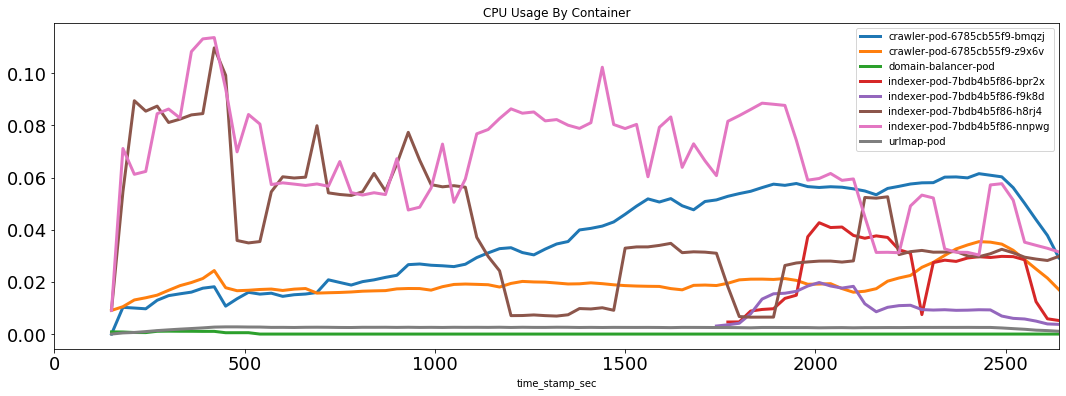

In [194]:
# Plot
pd_cpu_plt.plot(figsize=(18,6), title = 'CPU Usage By Container', fontsize=18, lw=3)
plt.show()

# Memory by node

In [195]:
memory_by_node = pd.read_csv("./sample_charts/memory_by_node.csv", sep=';')
memory_by_node.head(3)

,Time,192.168.99.100 Available,192.168.99.100 Free,192.168.99.100 Total
0,2019-12-08T21:08:00-05:00,NaN,NaN,NaN
1,2019-12-08T21:08:30-05:00,2.499854e+09,1.193382e+09,4.132012e+09
2,2019-12-08T21:09:00-05:00,2.466570e+09,1.152258e+09,4.132012e+09


In [199]:
# 1. Change Time to datetime
memory_by_node['time_stamp'] = pd.to_datetime(memory_by_node['Time'])
# 2. Substract the first time and make it into relative time
memory_by_node['time_stamp'] = memory_by_node['time_stamp'].sub(memory_by_node['time_stamp'][0], axis=0)
# 3. Add another column for time in seconds
memory_by_node['time_stamp_sec'] = pd.Series(np.random.randn(len(memory_by_node['Time'])), index = memory_by_node.index)
# 4. Change the relative time into seconds
memory_by_node['time_stamp_sec'] = memory_by_node['time_stamp'].dt.total_seconds()
# 5. Drop unnecessary columns
memory_by_node_plt = memory_by_node.drop(columns=['Time', 'time_stamp'])
# 6. Reset the index to time_stamp_sec
memory_by_node_plt.set_index('time_stamp_sec', inplace = True)

memory_by_node_plt.head(3)

,192.168.99.100 Available,192.168.99.100 Free,192.168.99.100 Total
time_stamp_sec,,,
0.0,NaN,NaN,NaN
30.0,2.499854e+09,1.193382e+09,4.132012e+09
60.0,2.466570e+09,1.152258e+09,4.132012e+09


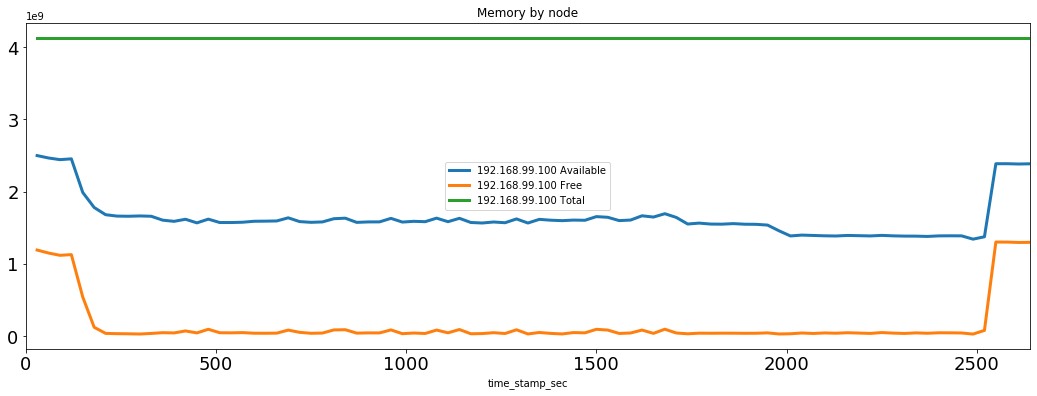

In [201]:
# Plot
memory_by_node_plt.plot(figsize=(18,6), title = 'Memory by node', fontsize=18, lw=3)
plt.show()

# Memory by pod

In [202]:
memory_by_pod = pd.read_csv("./sample_charts/memory_by_pod.csv", sep=';')
memory_by_pod.head(3)

,Time,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
0,2019-12-08T21:08:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08T21:09:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-08T21:10:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# 1. Change Time to datetime
memory_by_pod['time_stamp'] = pd.to_datetime(memory_by_pod['Time'])
# 2. Substract the first time and make it into relative time
memory_by_pod['time_stamp'] = memory_by_pod['time_stamp'].sub(memory_by_pod['time_stamp'][0], axis=0)
# 3. Add another column for time in seconds
memory_by_pod['time_stamp_sec'] = pd.Series(np.random.randn(len(memory_by_pod['Time'])), index = memory_by_pod.index)
# 4. Change the relative time into seconds
memory_by_pod['time_stamp_sec'] = memory_by_pod['time_stamp'].dt.total_seconds()
# 5. Drop unnecessary columns
memory_by_pod_plt = memory_by_pod.drop(columns=['Time', 'time_stamp'])
# 6. Reset the index to time_stamp_sec
memory_by_pod_plt.set_index('time_stamp_sec', inplace = True)

memory_by_pod_plt.head(3)

,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
time_stamp_sec,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


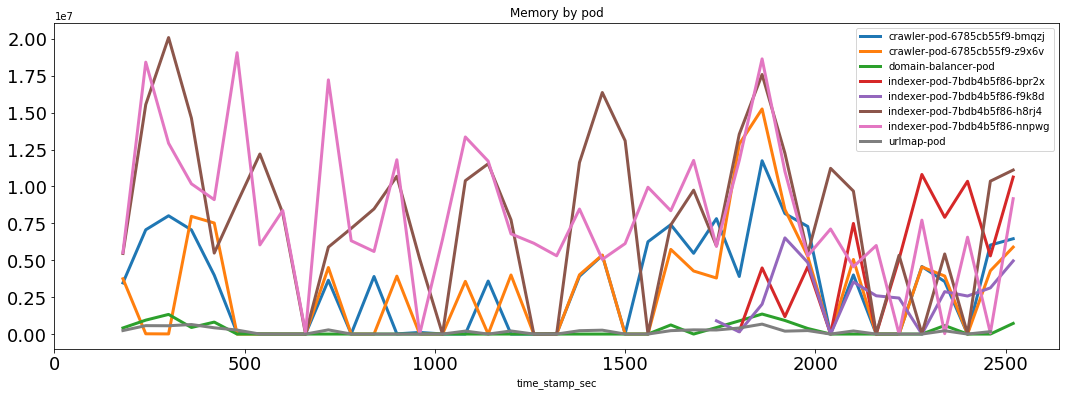

In [205]:
memory_by_pod_plt.plot(figsize=(18,6), title = 'Memory by pod', fontsize=18, lw=3)
plt.show()

# Network by Pod

In [206]:
network_by_pod = pd.read_csv("./sample_charts/network_by_pod.csv", sep=';')
network_by_pod.head(3)

,Time,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
0,2019-12-08T21:07:30-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08T21:08:15-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-08T21:09:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
# 1. Change Time to datetime
network_by_pod['time_stamp'] = pd.to_datetime(network_by_pod['Time'])
# 2. Substract the first time and make it into relative time
network_by_pod['time_stamp'] = network_by_pod['time_stamp'].sub(network_by_pod['time_stamp'][0], axis=0)
# 3. Add another column for time in seconds
network_by_pod['time_stamp_sec'] = pd.Series(np.random.randn(len(network_by_pod['Time'])), index = network_by_pod.index)
# 4. Change the relative time into seconds
network_by_pod['time_stamp_sec'] = network_by_pod['time_stamp'].dt.total_seconds()
# 5. Drop unnecessary columns
network_by_pod_plt = network_by_pod.drop(columns=['Time', 'time_stamp'])
# 6. Reset the index to time_stamp_sec
network_by_pod_plt.set_index('time_stamp_sec', inplace = True)

network_by_pod_plt.head(3)

,crawler-pod-6785cb55f9-bmqzj,crawler-pod-6785cb55f9-z9x6v,domain-balancer-pod,indexer-pod-7bdb4b5f86-bpr2x,indexer-pod-7bdb4b5f86-f9k8d,indexer-pod-7bdb4b5f86-h8rj4,indexer-pod-7bdb4b5f86-nnpwg,urlmap-pod
time_stamp_sec,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


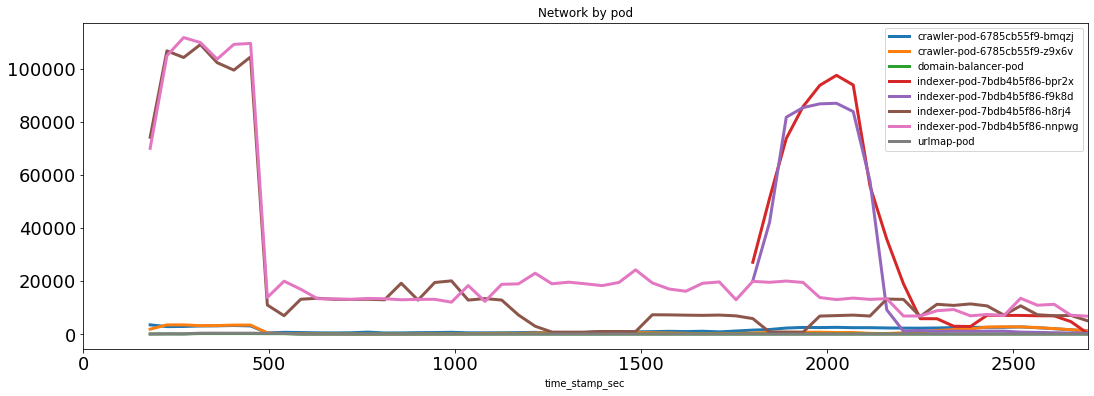

In [208]:
network_by_pod_plt.plot(figsize=(18,6), title = 'Network by pod', fontsize=18, lw=3)
plt.show()

# indexed_docs

In [210]:
indexed_docs = pd.read_csv("./sample_charts/indexed_docs.csv", sep=';')
indexed_docs.head(3)

,Time,Indexed files,Number of indexer pods
0,2019-12-08T21:07:30-05:00,NaN,NaN
1,2019-12-08T21:08:45-05:00,NaN,NaN
2,2019-12-08T21:10:00-05:00,NaN,NaN


In [211]:
# 1. Change Time to datetime
indexed_docs['time_stamp'] = pd.to_datetime(indexed_docs['Time'])
# 2. Substract the first time and make it into relative time
indexed_docs['time_stamp'] = indexed_docs['time_stamp'].sub(indexed_docs['time_stamp'][0], axis=0)
# 3. Add another column for time in seconds
indexed_docs['time_stamp_sec'] = pd.Series(np.random.randn(len(indexed_docs['Time'])), index = indexed_docs.index)
# 4. Change the relative time into seconds
indexed_docs['time_stamp_sec'] = indexed_docs['time_stamp'].dt.total_seconds()
# 5. Drop unnecessary columns
indexed_docs_plt = indexed_docs.drop(columns=['Time', 'time_stamp'])
# 6. Reset the index to time_stamp_sec
indexed_docs_plt.set_index('time_stamp_sec', inplace = True)

indexed_docs_plt.head(3)

,Indexed files,Number of indexer pods
time_stamp_sec,,
0.0,NaN,NaN
75.0,NaN,NaN
150.0,NaN,NaN


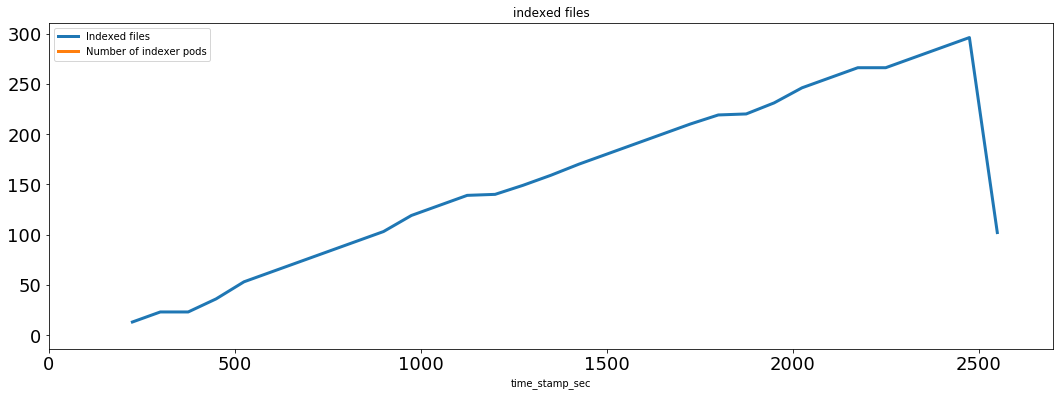

In [212]:
indexed_docs_plt.plot(figsize=(18,6), title = 'indexed files', fontsize=18, lw=3)
plt.show()

## First CSV file: "grafana_data_export_cpu.csv"

In [141]:
# Load the CSV
pd_raw = pd.read_csv("./grafana_data_export_cpu.csv", sep=';')
pd_raw.head(5)

,Series,Time,Value
0,cpu,2019-12-05T18:42:00-05:00,7.500
1,cpu,2019-12-05T18:42:20-05:00,7.875
2,cpu,2019-12-05T18:42:40-05:00,7.850
3,cpu,2019-12-05T18:43:00-05:00,7.500
4,cpu,2019-12-05T18:43:20-05:00,7.525


## For "CPU"

In [142]:
# Seperate the cpu and the memory
# CPU
cpu_pd_raw = pd_raw.loc[pd_raw['Series'] == 'cpu']

In [143]:
cpu_pd_raw.reset_index().head(5)

,index,Series,Time,Value
0,0,cpu,2019-12-05T18:42:00-05:00,7.500
1,1,cpu,2019-12-05T18:42:20-05:00,7.875
2,2,cpu,2019-12-05T18:42:40-05:00,7.850
3,3,cpu,2019-12-05T18:43:00-05:00,7.500
4,4,cpu,2019-12-05T18:43:20-05:00,7.525


In [144]:
# Drop the null and NAN
cpu_pd = cpu_pd_raw[np.isfinite(cpu_pd_raw['Value'])]
# cpu_pd.set_index('Time', inplace = True)
# cpu_pd.drop(columns=['Series']).head(3)

In [145]:
cpu_pd.head(3)

,Series,Time,Value
0,cpu,2019-12-05T18:42:00-05:00,7.500
1,cpu,2019-12-05T18:42:20-05:00,7.875
2,cpu,2019-12-05T18:42:40-05:00,7.850


In [146]:
cpu_pd["Time"][0]

'2019-12-05T18:42:00-05:00'

In [147]:
# Change "Time" into datetime
cpu_pd['time_stamp'] = pd.to_datetime(cpu_pd['Time'])

In [148]:
cpu_pd.head(3)

,Series,Time,Value,time_stamp
0,cpu,2019-12-05T18:42:00-05:00,7.500,2019-12-05 18:42:00-05:00
1,cpu,2019-12-05T18:42:20-05:00,7.875,2019-12-05 18:42:20-05:00
2,cpu,2019-12-05T18:42:40-05:00,7.850,2019-12-05 18:42:40-05:00


In [149]:
cp_of_pd = cpu_pd
cp_of_pd['time_stamp'] = cp_of_pd['time_stamp'].sub(cp_of_pd['time_stamp'][0], axis=0)

In [150]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40


In [152]:
cp_of_pd['time_stamp_sec'] = pd.Series(np.random.randn(len(cp_of_pd['Time'])), index = cp_of_pd.index)

In [153]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp,time_stamp_sec
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00,-0.823578
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20,-1.345504
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40,0.294568


In [155]:
cp_of_pd['time_stamp_sec'] = cp_of_pd['time_stamp'].dt.total_seconds()

In [156]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp,time_stamp_sec
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00,0.0
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20,20.0
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40,40.0


In [157]:
cpu_pd.set_index('time_stamp_sec', inplace = True)
# cpu_pd.drop(columns=['Series', ])

In [158]:
cpu_pd_plt = cpu_pd.drop(columns=['Series', 'Time', 'time_stamp'])

In [159]:
cpu_pd_plt.head(3)

,Value
time_stamp_sec,
0.0,7.500
20.0,7.875
40.0,7.850


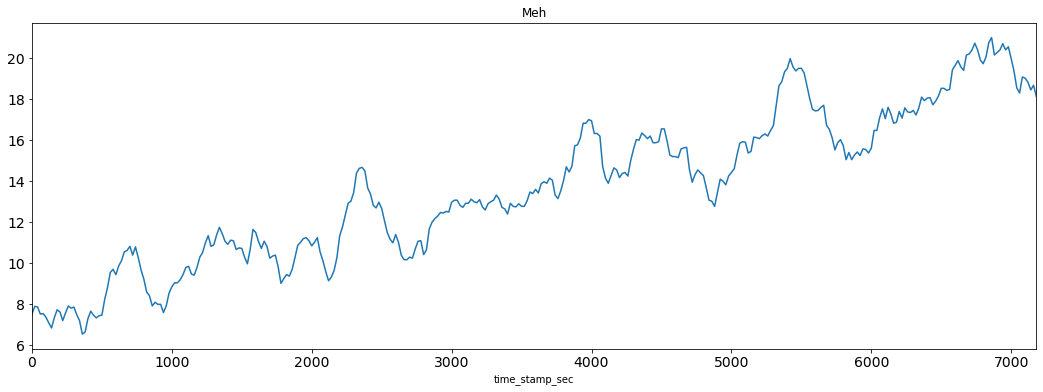

In [160]:
# Plot
cpu_pd_plt.Value.plot(figsize=(18,6), title = 'Meh', fontsize=14)
plt.show()

In [ ]:
# 

## For memory

In [18]:
# Memory
memory_pd_raw = pd_raw.loc[pd_raw['Series'] == 'memory']

In [23]:
memory_pd_raw.reset_index()

,index,Series,Time,Value
0,360,memory,2019-12-05T18:42:00-05:00,NaN
1,361,memory,2019-12-05T18:42:20-05:00,NaN
2,362,memory,2019-12-05T18:42:40-05:00,7.0
3,363,memory,2019-12-05T18:43:00-05:00,NaN
4,364,memory,2019-12-05T18:43:20-05:00,NaN
...,...,...,...,...
355,715,memory,2019-12-05T20:40:20-05:00,NaN
356,716,memory,2019-12-05T20:40:40-05:00,NaN
357,717,memory,2019-12-05T20:41:00-05:00,12.0
358,718,memory,2019-12-05T20:41:20-05:00,NaN


In [29]:
# Drop the NAN or null
memory_pd = memory_pd_raw[np.isfinite(memory_pd_raw['Value'])]

In [30]:
memory_pd

,Series,Time,Value
362,memory,2019-12-05T18:42:40-05:00,7.0
365,memory,2019-12-05T18:43:40-05:00,5.0
368,memory,2019-12-05T18:44:40-05:00,1.0
371,memory,2019-12-05T18:45:40-05:00,5.0
374,memory,2019-12-05T18:46:40-05:00,4.0
...,...,...,...
705,memory,2019-12-05T20:37:00-05:00,16.0
708,memory,2019-12-05T20:38:00-05:00,13.0
711,memory,2019-12-05T20:39:00-05:00,11.0
714,memory,2019-12-05T20:40:00-05:00,9.0
